# [LAB 02] DBSCAN | BaseModel

## #01. DBSCAN 개요
- Density -Based Spatial Clustering of Applicatrions with Noise
- 밀도 기반 군집화 알고리즘
- 데이터가 많이 몰려 있는 영역을 군집으로 인식함

### [1] KMeans 와의 비교

| 구분 | KMeans | DBSCAN |
|------|--------|--------|
| 군집 기준 | 중심점(평균) | 밀도 |
| 군집 수 | 사전 지정(k 필요) | 자동 결정 |
| 핵심 아이디어 | 중심과의 거리 최소화 | 이웃 밀집 영역 확장 |
| 주요 파라미터 | k | ε, minPts |
| 초기값 영향 | 큼 (랜덤 초기화) | 거의 없음 |
| 군집 형태 | 원형(구형)에 유리 | 비정형 형태 가능 |
| 이상치 처리 | 군집에 강제 포함 | Noise로 분리 |
| 스케일링 필요성 | 필수 | 필수(더 중요) |
| 고차원 데이터 | 비교적 가능 | 성능 저하 큼 |
| 계산 속도 | 빠름 | 느릴 수 있음 |
| 결과 안정성 | 초기값 따라 변동 | 비교적 안정적 |
| 해석 초점 | 평균적 특성(페르소나 도출 적합) | 구조·밀집 패턴 |
| 주요 용도 | 구조 요약, 세분화 | 구조 탐색, 이상치 탐지 |


- KMeans 은 중심점을 기준으로 얼마나 가까운가를 보는거라면
- DBSCAN 은 몇 개가 모여 있을 때 하나의 군집으로 볼지 지정해서 보는 것
- DBSCAN 의 주요 목적은 노이즈를 검출해 내느것 
- 핵심 벡터로는 입실론와 minPts가 있음


### [2] DBSCAN 의 핵심 아이디어

- 주변에 이웃이 충분히 많은 점은 의미 있는 점
- 밀도가 이어지면 같은 굽집으로 분류
- 밀도가 끊기면 다른 군집
- 밀도가 부족하면 노이즈


### [3] DBSCAN 에 사용되는 핵심 개념

| 개념 | 의미 |
|------|------|
| ε (epsilon) | 이웃으로 인정하는 반경 거리 |
| minPts | ε 안에 있어야 하는 최소 이웃 수 |
| Core Point | ε 안에 minPts 이상의 이웃이 존재 (주요 핵심) |
| Border Point | Core 이웃이지만 minPts 미만 (변두리) |
| Noise | 어떤 군집에도 속하지 않음 (이상치) |



### [4] 장단점

| 장점 | 단점 |
|------|------|
| 군집 수를 사전에 지정할 필요 없음 | ε (epsilon) 설정이 어려움 |
| 이상치(Noise)를 명시적으로 분리 가능 | 밀도 차이가 큰 데이터에 취약 |
| 비정형·비선형 군집 구조 탐색 가능 | 고차원 데이터에서 거리 의미 약화 |
| 초기값(random seed)에 영향 거의 없음 | 변수 스케일에 매우 민감 |
| 구조 탐색 목적에 적합 | 대용량 데이터에서 계산 비용 증가 |
|  | 군집 대표값(중심) 정의가 어려움 |


### [5] 전처리와 실무 주의점

| 구분 | 내용 |
|------|------|
| 스케일링 | 거리 기반 알고리즘이므로 **반드시 스케일링 필요**<br>변수 스케일 차이가 해석을 왜곡함 |
| 변수 선택 | 불필요한 변수 많으면 밀도 구조 왜곡됨<br>해석 가능한 핵심 변수 위주로 구성 |
| 차원 수 | 고차원일수록 거리 의미 약화됨<br>PCA 등 차원 축소 후 적용 고려 |
| ε 설정 | 가장 민감한 파라미터<br>k-distance plot으로 참고값 탐색 |
| minPts 설정 | 일반적으로 5 이상 사용<br>차원이 커질수록 증가 필요 |
| 밀도 차이 | 군집 간 밀도 차이가 크면 성능 저하<br>단일 ε로 모든 군집 포착 어려움 |
| 이상치 해석 | Noise는 오류가 아님<br>의미 있는 특이 패턴일 수 있음 |
| 목적 적합성 | 예측·요약 목적에 부적합<br>구조 탐색·이상치 분석에 적합 |



- PCA > 성질이 비슷한변수들끼리 묶어서 또다른 변수를 만들어내는 것 (다만 데이터가 유실되므로 각 변수들의 효과를 해석하기엔 한계가 있을 수 있음)

- 분석가 주관 영향을 가장 많이 받는 것 > 입실론, MIN POINT


### [6] 실무 활용 사례

| 분야 | 활용 목적 |
|------|-----------|
| 📍 GIS | 상권·핫스팟 탐색 |
| 🏠 부동산 | 비정상 거래 군집 분리 |
| 💳 금융 | 이상 거래 탐지 |
| 🏭 제조 | 불량 패턴 탐색 |
| 📊 EDA | 구조 탐색용 사전 분석 |
 



## #02. 준비작업
### [1] 패키지 참조

In [19]:
from hossam import load_data, my_dpi
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

from scipy.spatial import ConvexHull


### [2] 데이터 가져오기

In [20]:
origin = load_data('game_usage')
origin.head()

게임 이용시간(time spent)과 레벨(game level)에 대한 가상 데이터


,time spent,game level
0,39,944
1,55,705
2,29,757
3,59,999
4,7,109


### [3] 데이터 스케일링
- standardScaler 를 통해 -1 ~ 1 .사이의 값으로 변화

In [21]:
scaler = StandardScaler()
df1 = DataFrame(scaler.fit_transform(origin) , columns=origin.columns)
df1.head()

,time spent,game level
0,-0.250733,1.474805
1,0.326494,0.606546
2,-0.611500,0.795456
3,0.470801,1.674613
4,-1.405187,-1.558652


## #03.DBSCAN 군집 분석
### [1]주요 하이퍼 파라미터

(1) eps
- 거리 데이터이기 때문에 스케일링 된 값이더라도 (-1 ~ 1) 무조건 양수가 나옴
- 1보다 큰 값은 나올 수 없음


(2) n_jobs 
- 비동기 처리 설정할 수 있음
- -1 로 하면 cpu 가 처리 가능한 최대치의 비동기 값으로 설정 가능
 

- random_state 가 없어도 밀집 기반이기 때문에 항상 동일한 결과값으로 나옴


*n_jobs 비동기 처리 가능하게하는 옵션 ,-1 로 하면 최대로 놀리게됨

-1로 떨어지면 노이즈 , 그 외는 굽집 번호


벡터단위로 구별해서 쪼개서 그려야함


| 하이퍼파라미터 | 설명 | 기본값 | 추천 설정 가이드 | 가능한 값 | 권장값 |
|---------------|------|--------|------------------|-----------|--------|
| eps | 이웃으로 인정하는 최대 거리 | 0.5 | 가장 민감한 파라미터<br>반드시 **스케일링 이후** 설정<br>k-distance plot으로 후보 탐색 권장 | 양의 실수 | 데이터 표준화 기준 **0.3 ~ 1.0** 범위에서 탐색 |
| min_samples | eps 내 최소 이웃 수 (minPts) | 5 | 일반적으로 **차원 수 + 1 이상**<br>노이즈 줄이려면 증가 | 양의 정수 | **5 ~ 10** (저차원 실습 기준) |
| metric | 거리 측정 방식 | `'euclidean'` | 수치형 데이터에서는 기본값 유지 권장<br>거리 정의 변경 시 해석 어려움 | 문자열, callable | `'euclidean'` |
| algorithm | 이웃 탐색 알고리즘 | `'auto'` | 수업·실무 대부분 auto 사용<br>차원 낮고 데이터 작을 때만 변경 고려 | `'auto'`, `'ball_tree'`, `'kd_tree'`, `'brute'` | `'auto'` |
| leaf_size | 트리 기반 탐색 성능 조절 | 30 | 성능 튜닝 목적이 아니라면 변경 불필요 | 양의 정수 | 30 |
| n_jobs | 병렬 처리 CPU 수 | None | 계산 시간 단축 목적<br>실습 환경에서는 병렬 처리 유리 | None, -1, 정수 | **-1** |


In [22]:
#모델 객체 생성
estimator = DBSCAN(eps=0.5 , min_samples=5,n_jobs=-1)

#모델 학습
estimator.fit(df1)

# 예측 -> predict() 메서드는 따로 없고, labels_ 로 봐야함, 이떄 -1 이 나오면 이상치임
cluster = estimator.labels_
cluster




array([ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0, -1,  1,  0,
        1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1, -1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0])

### [2]결과를 포함하는 데이터 프레임 생성


In [23]:
df2 = df1.copy()
df2['cluster'] = cluster
df2.head()

,time spent,game level,cluster
0,-0.250733,1.474805,0
1,0.326494,0.606546,0
2,-0.611500,0.795456,0
3,0.470801,1.674613,0
4,-1.405187,-1.558652,1


### [3] 핵심 벤터 (core) / 외곽벡터 (border) / 노이즈 (noise) 구분하여 시각화 하기

| vector | 해석 |
|--------|------|
| core | 정상 패턴의 대표 |
| border | 경계적 정상 |
| noise | 이상치 후보 |


#### 핵심벡터의 인덱스
- 학습에 사용된 데이터 프레임에 대한 행 인덱스 목록
- core sms 인덱스로 구별이 가능함

In [24]:
estimator.core_sample_indices_

array([ 1,  2,  4,  5,  7,  8,  9, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 55, 57, 58, 60, 61, 62,
       63, 64, 65, 66, 68, 69, 70, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99])

#### 벡터 유형 구분

In [25]:
df3 = df2.copy()

#기본적으로 모두 외곽 벡터로 지정
df3['vector'] = 'border'

#핵심 벡터인 경우 'core' 로 지정
df3.loc[estimator.core_sample_indices_,'vector'] = 'core'

#노이즈 분류
df3.loc[df3['cluster'] == -1 , 'vector']='noise'

df3.head()


,time spent,game level,cluster,vector
0,-0.250733,1.474805,0,border
1,0.326494,0.606546,0,core
2,-0.611500,0.795456,0,core
3,0.470801,1.674613,0,border
4,-1.405187,-1.558652,1,core


### [3] 결과 시각화

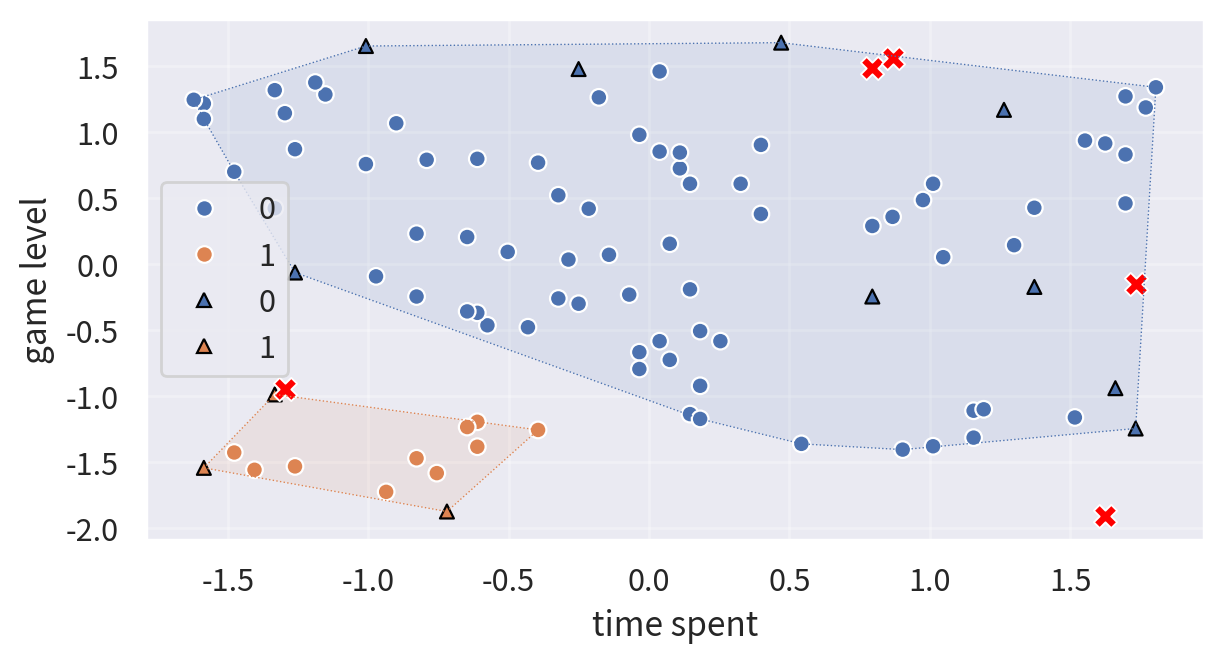

In [26]:
vdf = df3.copy()
hue_field ='cluster'
x_field = 'time spent'   
y_field = 'game level'

# 1) 그래프 초기화
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
my_dpi=200

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)


# 군집별 값의 종류별로 반복문 실행
for c in vdf[hue_field].unique():

#이상치는 건너뜀
  if c == -1:
    continue

  #값의 종류별로 데이터 프레임 구분
  df_c = vdf.loc[vdf[hue_field] == c , [x_field,y_field]]

  try:
    #외각선 좌표 계산
    hull = ConvexHull(df_c)

    #마지막 좌표 이후에 첫번쨰 좌표를 연결
    points = np.append(hull.vertices,hull.vertices[0])

    ax.plot( #type:ignore
      df_c.iloc[points,0] , df_c.iloc[points,1] , linewidth = 0.5 , linestyle =':'
      )
    
    ax.fill(df_c.iloc[points,0] , df_c.iloc[points ,1], alpha =0.1)


  except:
    pass


# 핵심 벡터만 표시
sb.scatterplot(
  data = vdf[(vdf[hue_field] !=-1)  & (vdf['vector'] =='core')],
  x=x_field,
  y=y_field,
  hue='cluster',
  edgecolor='white',
  linewidth=0.8

)


# 외곽 벡터만 표시
sb.scatterplot(
  data = vdf[(vdf[hue_field] !=-1)  & (vdf['vector'] =='border')],
  x=x_field,
  y=y_field,
  hue='cluster',
  marker ='^',
  s=25,
  edgecolor='#000',
  linewidth=0.8

)



# 노이즈 벡터만 표시
sb.scatterplot(
  data = vdf[vdf['vector'] =='noise'],
  x=x_field,
  y=y_field,
  color ='red',
  marker = 'X',
  s=70
)

ax.grid(True ,alpha =0.3) #배경 격자 표시
plt.tight_layout()
plt.show()
plt.close()

#### 인사이트 도출
- 군집의 결과로 설정된 label 값이 -1 인 경우는 속한 집단이 없는 것, 즉 Noise 로 분류 되었음을 의미함
- DBSCAN 은 밀도 기반 클러스터링 알고리즘이므로, 데이터 포인트들 사이의 밀집도를 기준으로 클러스터를 형성하는데 이 과정에서 일정 밀도 이상의 데이터 포인트들은 클러스터에 포함되지만, 그 기준을 만족하지 못하는 데이터 포인트들은 잡음으로 분류

- 잡음으로 분류된 노이즈 데이터는 이상치로해석 가능
- 이를 해결하려면 이상치 정제후 수행 
- eps, minPts 파라미터를 조정하여 클러스터링 결과 개선
